In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2015-01-01' #input
end = '2022-08-05' #input
symbol1 = '^GSPC' #input
symbol2 = 'H' #input

In [3]:
market = yf.download(symbol1, start=start, end=end)['Adj Close']
stocks = yf.download(symbol2, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
market_returns = market.pct_change().dropna()
stocks_returns = stocks.pct_change().dropna()

In [5]:
def active_risk(stock_returns, market_returns):
    N = 14  
    ar = np.sqrt((sum((stock_returns - market_returns)**2)/(N-1)))
    return ar

Text(0, 0.5, 'Active Risk')

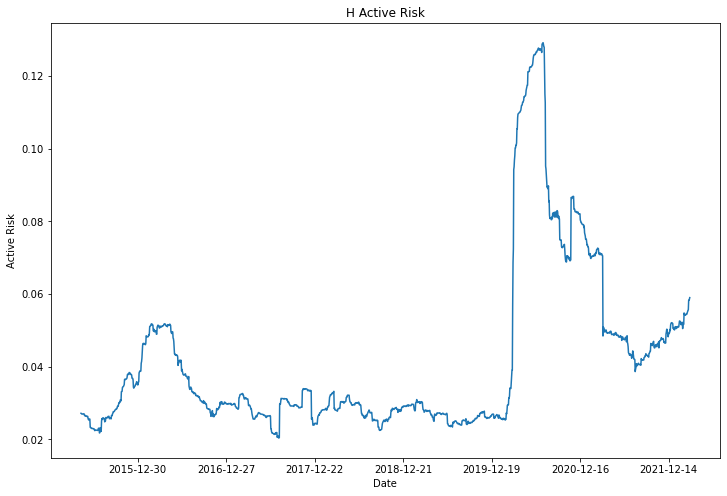

In [6]:
# Compute the running Active Risk
running = [active_risk(stocks_returns[i-90:i], market_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Active Risk up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol2 + ' Active Risk')
plt.xlabel('Date')
plt.ylabel('Active Risk')

In [7]:
stock_ar = active_risk(stocks_returns, market_returns)
stock_ar

0.22306392195953031

In [8]:
running = [active_risk(stocks_returns[i-90:i], market_returns[i-90:i]) for i in range(90, len(stocks_returns))]
running

[0.0271572458236302,
 0.027118517164054355,
 0.026956904970224283,
 0.026953785971969502,
 0.02694616980125931,
 0.026937503236516537,
 0.02700688671379564,
 0.027020292749700907,
 0.027003551021285238,
 0.026969352787403453,
 0.0265012997273363,
 0.026556444169886173,
 0.02656462687106366,
 0.02635376643267473,
 0.026345072246517946,
 0.026366836045777397,
 0.026277931227720378,
 0.026368311060161347,
 0.02630133233680233,
 0.026299280692878818,
 0.025696296441042973,
 0.025409767372368892,
 0.025300093280199967,
 0.02558971164568847,
 0.025589727889401098,
 0.025546327421034427,
 0.023284516538219294,
 0.023283002101172453,
 0.023109737107523103,
 0.023065378012728364,
 0.023097050297367572,
 0.0229333034452282,
 0.022959523288741648,
 0.022953734107130787,
 0.022926049032916566,
 0.022952917721242715,
 0.0229148176405939,
 0.022672127555579184,
 0.022707135991998202,
 0.02237555724981275,
 0.0224961409463661,
 0.022484808548097118,
 0.02253870462900931,
 0.022521439972112076,
 0.022